___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7



#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1. Відкрийте файл та виведіть описову статистику

In [3]:
df = pd.read_csv(r'C:\Users\iov\Desktop\Course Data Science\Module 7. Supervised learning & Ensemble\loan_data.csv')

In [4]:
df.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [ ]:
df.info()

In [ ]:
df.describe().T

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

(array([  8., 143., 360., 363., 285., 193., 103.,  47.,  21.,  10.]),
 array([617. , 637.5, 658. , 678.5, 699. , 719.5, 740. , 760.5, 781. ,
        801.5, 822. ]),
 <BarContainer object of 10 artists>)

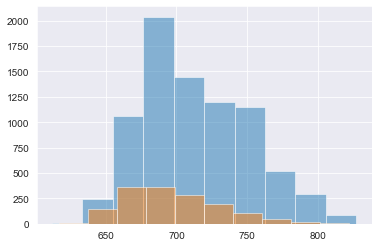

In [5]:
his1 = df[df['not.fully.paid'] == 0 ]['fico']
his2 = df[df['not.fully.paid'] == 1 ]['fico']
sns.set_style('darkgrid')

plt.hist(his1, alpha=0.5)
plt.hist(his2, alpha=0.5)

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

C:\Users\iov\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


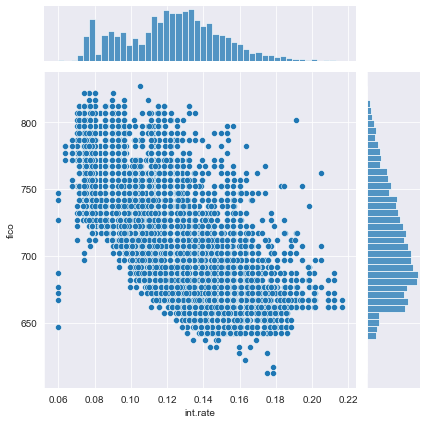

In [6]:
sns.jointplot(df['int.rate'], df['fico'])

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

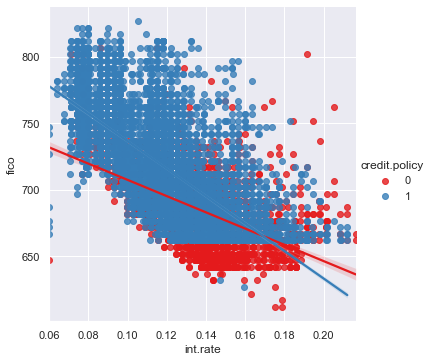

In [7]:
sns.set_theme(color_codes=True)
sns.lmplot(x = 'int.rate', y ='fico',  hue="credit.policy", palette="Set1", data = df)

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

In [8]:
df1 = pd.get_dummies(df, columns= ['purpose'], dtype='int64')


6. Розбийте датасет на тестві та трейнові дані

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [10]:
X = df1.drop('credit.policy', axis=1)
y = df1['credit.policy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X.columns

Index(['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths',
       'delinq.2yrs', 'pub.rec', 'not.fully.paid', 'purpose_all_other',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики


In [11]:
from sklearn.linear_model import LogisticRegression


logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

sc_1_LR = round(logmodel.score(X_train,y_train), 4)
sc_2_LR = round(logmodel.score(X_test,y_test), 4)
print(f' R^2 на тренінговому наборі для логістичної регресії ==> {sc_1_LR}')
print(f' R^2 на тестовому наборі для логістичної регресії ==> {sc_2_LR}')

y_predictions = logmodel.predict(X_test)

result = metrics.classification_report(y_test, y_predictions)
print('Метріки класифікації для логістичної регресії')
print(result)

confusion_matrix = metrics.confusion_matrix(y_test,y_predictions)

print(' Матриця невідповідностей для лог.регресії')
print(pd.DataFrame(confusion_matrix))

print(f'Точність моделі лог.регресії для тестового набору ==> {metrics.accuracy_score(y_test,y_predictions)}')
print(f'Точність моделі лог.регресії для константного класифікатора ==> {metrics.accuracy_score(y_test, np.ones_like(y_test,))}')


 R^2 на тренінговому наборі для логістичної регресії ==> 0.8733
 R^2 на тестовому наборі для логістичної регресії ==> 0.8669
Метріки класифікації для логістичної регресії
              precision    recall  f1-score   support

           0       0.80      0.45      0.57       383
           1       0.88      0.97      0.92      1533

    accuracy                           0.87      1916
   macro avg       0.84      0.71      0.75      1916
weighted avg       0.86      0.87      0.85      1916

 Матриця невідповідностей для лог.регресії
     0     1
0  172   211
1   44  1489
Точність моделі лог.регресії для тестового набору ==> 0.8669102296450939
Точність моделі лог.регресії для константного класифікатора ==> 0.8001043841336117


C:\Users\iov\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier(max_depth = 5).fit(X_train,y_train)

sc_1_DTC = round(treemodel.score(X_train,y_train),4)
print(f' R^2 на тренінговому наборі для дерева рішень ==> {sc_1_DTC}')
sc_2_DTC = round(treemodel.score(X_test,y_test),4)
print(f' R^2 на тестовому наборі для дерева рішень ==> {sc_2_DTC}')

y_tree_predictions = treemodel.predict(X_test)
y_tree_predictions_train = treemodel.predict(X_train)

result_tree = metrics.classification_report(y_test, y_tree_predictions)

print('Метріки класифікації для дерева рішень')
print(result_tree)

confusion_matrix_tree = metrics.confusion_matrix(y_test, y_tree_predictions)
print(' Матриця невідповідностей для дерева рішень')
print(pd.DataFrame(confusion_matrix_tree))

print(f'Точність моделі дерева рішень для тренін. набору ==> {metrics.accuracy_score(y_train, y_tree_predictions_train)}')
print(f'Точність моделі дерева рішень для тестового набору ==> {metrics.accuracy_score(y_test, y_tree_predictions)}')
print(f'Точність моделі дерева рішень для константного класифікатора ==> {metrics.accuracy_score(y_test, np.ones_like(y_test,))}')



 R^2 на тренінговому наборі для дерева рішень ==> 0.9876
 R^2 на тестовому наборі для дерева рішень ==> 0.9849
Метріки класифікації для дерева рішень
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       383
           1       0.99      1.00      0.99      1533

    accuracy                           0.98      1916
   macro avg       0.98      0.97      0.98      1916
weighted avg       0.98      0.98      0.98      1916

 Матриця невідповідностей для дерева рішень
     0     1
0  360    23
1    6  1527
Точність моделі дерева рішень для тренін. набору ==> 0.9876011485251892
Точність моделі дерева рішень для тестового набору ==> 0.9848643006263048
Точність моделі дерева рішень для константного класифікатора ==> 0.8001043841336117


In [25]:
# !pip install graphviz dtreeviz -q

In [13]:
from dtreeviz.trees import *

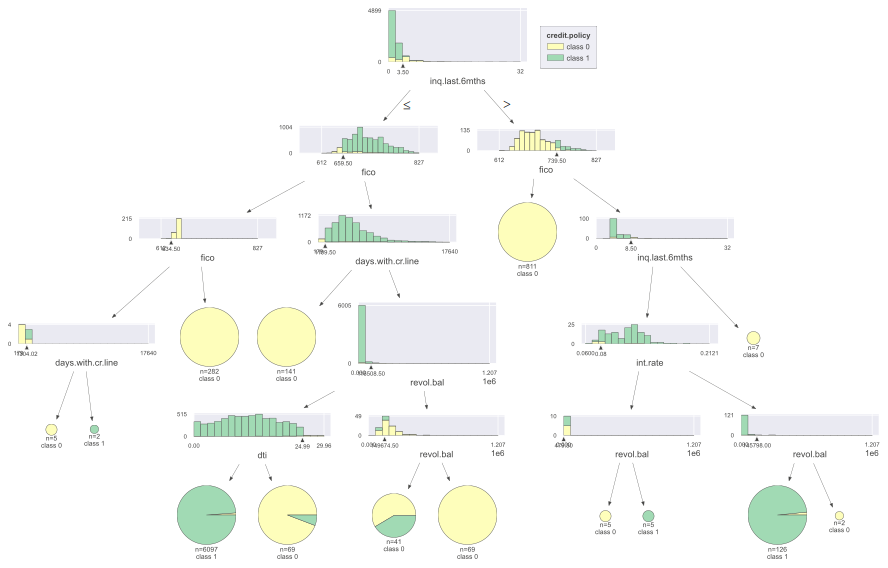

In [15]:


viz = dtreeviz(treemodel, 
               X_train,
               y_train,
               target_name='credit.policy',
               feature_names= np.array(X.columns))

viz

In [16]:
from sklearn.ensemble import RandomForestClassifier

RanForesModel = RandomForestClassifier(max_depth=5)
RanForesModel.fit(X_train,y_train)

sc_1_RFC = round(RanForesModel.score(X_train,y_train), 4)
sc_2_RFC = round(RanForesModel.score(X_test,y_test), 4)

print(f' R^2 на тренінговому наборі для випад.лісу ==> {sc_1_RFC}')
print(f' R^2 на тестовому наборі для випад.лісу ==> {sc_2_RFC}')

y_fores_predictions = RanForesModel.predict(X_test)

result_fores = metrics.classification_report(y_test, y_fores_predictions)
print('Метріки класифікації для випад.лісу')
print(result_fores)

confusion_matrix_fores = metrics.confusion_matrix(y_test, y_fores_predictions)
print(' Матриця невідповідностей для випад.лісу')
print(pd.DataFrame(confusion_matrix_fores))

print(f'Точність моделі випад.лісу для тестового набору ==> {metrics.accuracy_score(y_test, y_fores_predictions)}')
print(f'Точність моделі випад.лісу для константного класифікатора ==> {metrics.accuracy_score(y_test, np.ones_like(y_test,))}')


 R^2 на тренінговому наборі для випад.лісу ==> 0.9862
 R^2 на тестовому наборі для випад.лісу ==> 0.9823
Метріки класифікації для випад.лісу
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       383
           1       0.98      1.00      0.99      1533

    accuracy                           0.98      1916
   macro avg       0.99      0.96      0.97      1916
weighted avg       0.98      0.98      0.98      1916

 Матриця невідповідностей для випад.лісу
     0     1
0  351    32
1    2  1531
Точність моделі випад.лісу для тестового набору ==> 0.9822546972860126
Точність моделі випад.лісу для константного класифікатора ==> 0.8001043841336117


In [17]:
import xgboost as xgb


xgboost_model = xgb.XGBClassifier(n_estimators=10)
xgboost_model.fit(X_train, y_train)

sc_1_XGB = round(xgboost_model.score(X_train,y_train), 4)
sc_2_XGB = round(xgboost_model.score(X_test,y_test), 4)

print(f' R^2 на тренінговому наборі для XGB ==> {sc_1_XGB}')
print(f' R^2 на тестовому наборі для XGB ==> {sc_2_XGB}')


y_xgboost_predictions = xgboost_model.predict(X_test)

result_xgboost = metrics.classification_report(y_test, y_xgboost_predictions)
print('Метріки класифікації для XGBoost')
print(result_xgboost)

confusion_matrix_xgboost = metrics.confusion_matrix(y_test, y_xgboost_predictions)
print(' Матриця невідповідностей для XGBoost')
print(pd.DataFrame(confusion_matrix_xgboost))

print(f'Точність моделі XGBoost для тестового набору ==> {metrics.accuracy_score(y_test, y_xgboost_predictions)}')
print(f'Точність моделі XGBoost для константного класифікатора ==> {metrics.accuracy_score(y_test, np.ones_like(y_test,))}')


C:\Users\iov\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:20:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 R^2 на тренінговому наборі для XGB ==> 0.995
 R^2 на тестовому наборі для XGB ==> 0.9901
Метріки класифікації для XGBoost
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       383
           1       0.99      1.00      0.99      1533

    accuracy                           0.99      1916
   macro avg       0.99      0.98      0.98      1916
weighted avg       0.99      0.99      0.99      1916

 Матриця невідповідностей для XGBoost
     0     1
0  366    17
1    2  1531
Точність моделі XGBoost для тестового набору ==> 0.9900835073068893
Точність моделі XGBoost для константного класифікатора ==> 0.8001043841336117


9. Використайте ансамбель voting для всіх моделей

In [18]:
from sklearn.ensemble import VotingClassifier

logmodel_1 = LogisticRegression()
treemodel_2 = DecisionTreeClassifier(max_depth = 5)
RanForesModel_3 = RandomForestClassifier(max_depth=5)
xgboost_model_4 = xgb.XGBClassifier(n_estimators=100)

VotingClass = VotingClassifier([ ('m1', logmodel_1), ('m2', treemodel_2), ('m3', RanForesModel_3), ('m4', xgboost_model_4)])

VotingClass.fit(X_train, y_train)

print(VotingClass.score(X_train, y_train))
print(VotingClass.score(X_test, y_test))

C:\Users\iov\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\iov\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:20:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9909945184025059
0.988517745302714


10. Порівняйте результати моделей та зробіть висновки

In [19]:
res_all = dict()

res_all['LogisticRegression'] = (sc_1_LR, sc_2_LR, round(metrics.accuracy_score(y_test,y_predictions), 4))

res_all['DecisionTreeClassifier'] = (sc_1_DTC, sc_2_DTC, round(metrics.accuracy_score(y_test, y_tree_predictions),4))

res_all['RandomForestClassifier'] = (sc_1_RFC, sc_2_RFC, round(metrics.accuracy_score(y_test, y_fores_predictions),4) )

res_all['XGB'] = (sc_1_XGB, sc_2_XGB, round(metrics.accuracy_score(y_test, y_xgboost_predictions), 4)) 

res_all['Voting'] = (round(VotingClass.score(X_train, y_train),4), round(VotingClass.score(X_test, y_test), 4)) 
print(res_all)

{'LogisticRegression': (0.8733, 0.8669, 0.8669), 'DecisionTreeClassifier': (0.9876, 0.9849, 0.9849), 'RandomForestClassifier': (0.9862, 0.9823, 0.9823), 'XGB': (0.995, 0.9901, 0.9901), 'Voting': (0.991, 0.9885)}


In [20]:
print("Аналіз результатів по моделям")
df = pd.DataFrame.from_dict(res_all, orient='index',
                       columns=['R^2 train', 'R^2 test', 'accuracy'])
print(df)
print(f'Точність моделі для константного класифікатора ==> {metrics.accuracy_score(y_test, np.ones_like(y_test,))}')


Аналіз результатів по моделям
                        R^2 train  R^2 test  accuracy
LogisticRegression         0.8733    0.8669    0.8669
DecisionTreeClassifier     0.9876    0.9849    0.9849
RandomForestClassifier     0.9862    0.9823    0.9823
XGB                        0.9950    0.9901    0.9901
Voting                     0.9910    0.9885       NaN
Точність моделі для константного класифікатора ==> 0.8001043841336117


### Висновки:
Усі моделі дають майже однакові результати ефективності крім LogisticRegression. Моделі DecisionTreeClassifier та RandomForestClassifier дають на тестовому наборі майже таку ж саму результативність що і модель - ансамбль  VotingClassifier, більш ніж 98% точності.
Слід зазначити, модель – ансамбль RandomForestClassifier дала меншу точність ніж DecisionTreeClassifier, при цьому, обидві моделі будувалися з рівнем глибини дерев 5.

Всі моделі дають точність на тестовому наборі значно вище, ніж точність прогнозу для константного класифікатора (всі прогнози дорівнюють 1).  Можна дійти висновку, що моделі прогнозують різні класи (0 та 1).

Пропонується для прогнозування повернення чи не повернення кредитів використовувати  моделі DecisionTreeClassifier та XGBoost.


### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [21]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dpr = pd.read_csv(url)
dpr.head(10)


,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
5,Paris,FR,2019-06-20 19:00:00+00:00,FR04014,no2,25.3,µg/m³
6,Paris,FR,2019-06-20 18:00:00+00:00,FR04014,no2,23.9,µg/m³
7,Paris,FR,2019-06-20 17:00:00+00:00,FR04014,no2,23.2,µg/m³
8,Paris,FR,2019-06-20 16:00:00+00:00,FR04014,no2,19.0,µg/m³
9,Paris,FR,2019-06-20 15:00:00+00:00,FR04014,no2,19.3,µg/m³


In [23]:
dpr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


In [24]:
dpr.describe()

,value
count,2068.000000
mean,26.261847
std,13.479451
min,0.000000
25%,17.000000
50%,25.000000
75%,33.000000
max,97.000000


1. Виведіть список унікальних міст з датасету

In [25]:
for i in dpr['city'].drop_duplicates():
    print(i)

Paris
Antwerpen
London


2. Виведіть дату початку та кінця ведення даних

In [26]:
dpr['datetime'] =pd.to_datetime(dpr['date.utc'])

In [27]:
print(f'Дата початку ведення даних ==> {dpr["datetime"].min()}')
print(f'Дата кінця ведення даних ==> {dpr["datetime"].max()}')


Дата початку ведення даних ==> 2019-05-07 01:00:00+00:00
Дата кінця ведення даних ==> 2019-06-21 00:00:00+00:00


3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?

In [28]:
dpr['day_name']=dpr['datetime'].dt.day_name()

In [29]:
dpr['hours']=dpr['datetime'].dt.hour

In [30]:
dpr.groupby(['day_name', 'city' ]).mean()['value']

day_name   city     
Friday     Antwerpen    28.400000
           London       26.446809
           Paris        31.617986
Monday     Antwerpen    27.875000
           London       23.969697
           Paris        24.856250
Saturday   Antwerpen    33.500000
           London       24.977612
           Paris        25.266154
Sunday     Antwerpen    21.896552
           London       24.859155
           Paris        23.274306
Thursday   Antwerpen    27.500000
           London       24.780142
           Paris        28.600690
Tuesday    Antwerpen    22.214286
           London       24.885714
           Paris        30.999359
Wednesday  Antwerpen    21.125000
           London       23.460432
           Paris        29.165753
Name: value, dtype: float64

4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

Text(0, 0.5, 'середня конценрація $NO_2$')

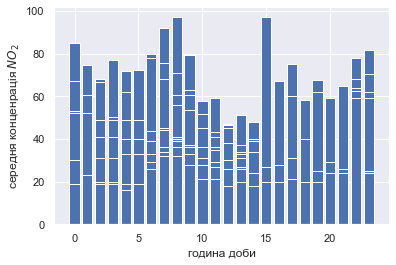

In [31]:
plt.bar(dpr['hours'], dpr['value'])
plt.xlabel('година доби')
plt.ylabel('середня конценрація $NO_2$')
